## Forecast Analysis Visualization

### 1. Load the Realtime Data

In [1]:
# Import necessary modules and the postprocessing library

import pandas as pd
import glob
import json 
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp
from postprocessinglib.forecast import forecast

 The list of stations can be extraxted from the json file that contains the station information, including its latitude, longitude and its identification nummber amongst other things.

In [2]:
json_file = '../../../postprocessinglib/forecast/available_stations.json'
# Load the JSON file
with open(json_file, 'r') as f:
    dt = json.load(f)

# Extract station numbers
station_list = [feature['properties']['STATION_NUMBER'] for feature in dt['features']]

# Print or use the list
print(station_list)

['05AA024', '05AC003', '05AD007', '05AG006', '05AJ001', '05BB001', '05BG010', '05BH004', '05BL024', '05BN012', '05CA009', '05CB001', '05CC002', '05CE001', '05CK004', '05DB006', '05DC001', '05DF001', '05EF001', '05FA001', '05FE004', '05GG001', '05HD039', '05HG001', '05KD003', '05KJ001']


Using the MESH-Scripts_pylib LIbrary, we are able to obtain the real-time data from "https://api.weather.gc.ca/". This Library should already be installed in your conda environment if you followed the steps from the documentation page.

### 2. Load the Forecast Data

From the forecast library, obtain the predicted data for the next 7 days as available from "https://geo.weather.gc.ca"

In [3]:
layer_name = 'DHPS_1km_RiverDischarge'
sim_rt = forecast.generate_nsrps(
    auth_path='../../../postprocessinglib/config.cfg',
    stn_list=station_list,
    layer_name=layer_name, 
    stn_locs_file=json_file
)

INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AA024; iteration: 0
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AC003; iteration: 1
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AD007; iteration: 2
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AG006; iteration: 3
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AJ001; iteration: 4
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BB001; iteration: 5
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BG010; iteration: 6
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BH004; iteration: 7
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BL024; iteration: 8
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05

In [4]:
sim_rt

,QOSIM_05AA024,QOSIM_05AC003,QOSIM_05AD007,QOSIM_05AG006,QOSIM_05AJ001,QOSIM_05BB001,QOSIM_05BG010,QOSIM_05BH004,QOSIM_05BL024,QOSIM_05BN012,...,QOSIM_05DC001,QOSIM_05DF001,QOSIM_05EF001,QOSIM_05FA001,QOSIM_05FE004,QOSIM_05GG001,QOSIM_05HD039,QOSIM_05HG001,QOSIM_05KD003,QOSIM_05KJ001
time,,,,,,,,,,,,,,,,,,,,,
2025-08-21 01:00:00,29.197647,2.992298,21.514875,31.197741,154.112488,52.039368,1.632399,102.152969,26.462759,131.403137,...,148.272736,277.365997,304.803894,0.406227,1.310606,336.488342,1.670751,99.070122,668.779602,476.742004
2025-08-21 02:00:00,29.031300,2.980325,22.502817,31.208633,150.454010,51.747871,1.619201,101.089676,25.883129,133.895432,...,148.943726,276.559021,303.985382,0.412292,1.325410,335.843048,1.692868,98.508705,636.713013,484.087372
2025-08-21 03:00:00,29.314705,2.971790,22.908522,31.232424,148.754318,51.501019,1.606428,100.715546,25.620071,133.966248,...,149.156418,276.330933,303.256714,0.423787,1.338618,335.572174,1.696891,98.393562,587.616760,490.221619
2025-08-21 04:00:00,30.022074,2.964017,23.307869,31.254545,147.125793,51.258007,1.592176,100.419998,25.364901,134.060532,...,149.253281,275.992126,302.575684,0.437036,1.348202,338.866791,1.699967,98.396835,546.056946,496.892212
2025-08-21 05:00:00,30.948421,2.956362,23.699438,31.282217,145.554962,51.018105,1.577966,100.197411,25.126373,134.175690,...,149.315201,275.555267,301.956116,0.451998,1.356576,347.982758,1.702841,98.580009,517.531616,503.556000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-26 20:00:00,31.125116,1.444772,38.341705,47.560795,167.437073,37.398930,1.086554,67.402367,7.534254,135.538864,...,116.041893,218.304550,306.121918,1.162726,5.972406,421.751526,1.431369,108.201675,712.338379,1110.598145
2025-08-26 21:00:00,31.055241,1.438629,38.273701,47.756783,167.410233,37.341179,1.085725,67.292953,7.502742,135.209259,...,115.962578,217.571899,305.943329,1.150025,5.904135,421.065674,1.431818,108.159904,710.434387,1111.714355
2025-08-26 22:00:00,30.978003,1.432011,38.209480,47.928562,167.398895,37.281357,1.084634,67.187111,7.470065,134.841873,...,115.883301,216.847229,305.773926,1.136775,5.836592,420.443054,1.430000,108.118843,708.841797,1112.864258


### 3. Extract the RealTime and Historical Data.

In [5]:
MESH_GDPS_file = "C:/Users/udenzeU/OneDrive - EC-EC/Fuad_Mesh_Dataset/srb_prediction_system_multi_run/gem_forecasts/05KJ001/2025072818/GDPS/RESULTS3/MESH_output_streamflow_ts.csv"
MESH_RDPS_file = "C:/Users/udenzeU/OneDrive - EC-EC/Fuad_Mesh_Dataset/srb_prediction_system_multi_run/gem_forecasts/05KJ001/2025072818/RDPS/RESULTS3/MESH_output_streamflow_ts.csv"

merged, lt = forecast.forecast_data_extraction(
    historical=True,
    historical_stat_ubounds=["q95", "q75"],
    historical_stat_lbounds=["q5","q25"],
    stn_list=station_list,
    prediction_files=[sim_rt, MESH_GDPS_file, MESH_RDPS_file], 
)

Window 2025-07-21–2025-07-22 in 4.5s
Window 2025-07-22–2025-07-23 in 4.6s
Window 2025-07-23–2025-07-24 in 4.5s
Window 2025-07-24–2025-07-25 in 4.4s
Window 2025-07-25–2025-07-26 in 4.4s
Window 2025-07-26–2025-07-27 in 4.6s
Window 2025-07-27–2025-07-28 in 4.6s
Window 2025-07-28–2025-07-29 in 4.7s
Window 2025-07-29–2025-07-30 in 4.6s
Window 2025-07-30–2025-07-31 in 4.6s
Window 2025-07-31–2025-08-01 in 4.8s
Window 2025-08-01–2025-08-02 in 4.7s
Window 2025-08-02–2025-08-03 in 4.7s
Window 2025-08-03–2025-08-04 in 4.8s
Window 2025-08-04–2025-08-05 in 4.8s
Window 2025-08-05–2025-08-06 in 4.5s
Window 2025-08-06–2025-08-07 in 4.6s
Window 2025-08-07–2025-08-08 in 4.7s
Window 2025-08-08–2025-08-09 in 4.7s
Window 2025-08-09–2025-08-10 in 4.6s
Window 2025-08-10–2025-08-11 in 4.6s
Window 2025-08-11–2025-08-12 in 4.5s
Window 2025-08-12–2025-08-13 in 4.9s
Window 2025-08-13–2025-08-14 in 4.6s
Window 2025-08-14–2025-08-15 in 4.6s
Window 2025-08-15–2025-08-16 in 4.6s
Window 2025-08-16–2025-08-17 in 4.5s
W

C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{fre

Fetched daily‐mean for 05AA024 in 8.7s
Fetched daily‐mean for 05AC003 in 10.3s
Fetched daily‐mean for 05AD007 in 10.4s
Fetched daily‐mean for 05AG006 in 9.1s
Fetched daily‐mean for 05AJ001 in 9.8s
Fetched daily‐mean for 05BB001 in 9.7s
Fetched daily‐mean for 05BG010 in 8.2s
Fetched daily‐mean for 05BH004 in 9.8s
Fetched daily‐mean for 05BL024 in 9.9s
Fetched daily‐mean for 05BN012 in 9.4s
Fetched daily‐mean for 05CA009 in 10.1s
Fetched daily‐mean for 05CB001 in 9.7s
Fetched daily‐mean for 05CC002 in 9.7s
Fetched daily‐mean for 05CE001 in 9.9s
Fetched daily‐mean for 05CK004 in 10.3s
Fetched daily‐mean for 05DB006 in 9.4s
Fetched daily‐mean for 05DC001 in 5.0s
Fetched daily‐mean for 05DF001 in 9.0s
Fetched daily‐mean for 05EF001 in 9.8s
Fetched daily‐mean for 05FA001 in 9.4s
Fetched daily‐mean for 05FE004 in 10.2s
Fetched daily‐mean for 05GG001 in 9.4s
Fetched daily‐mean for 05HD039 in 9.0s
Fetched daily‐mean for 05HG001 in 8.7s
Fetched daily‐mean for 05KD003 in 9.8s
Fetched daily‐mean f

### 4. Visualize the Data

Number of simulated data columns: 3
Number of linewidths provided is less than the number of columns. Number of columns : 4. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 4. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 4. Number of legends provided is:  1. Applying Default legend names


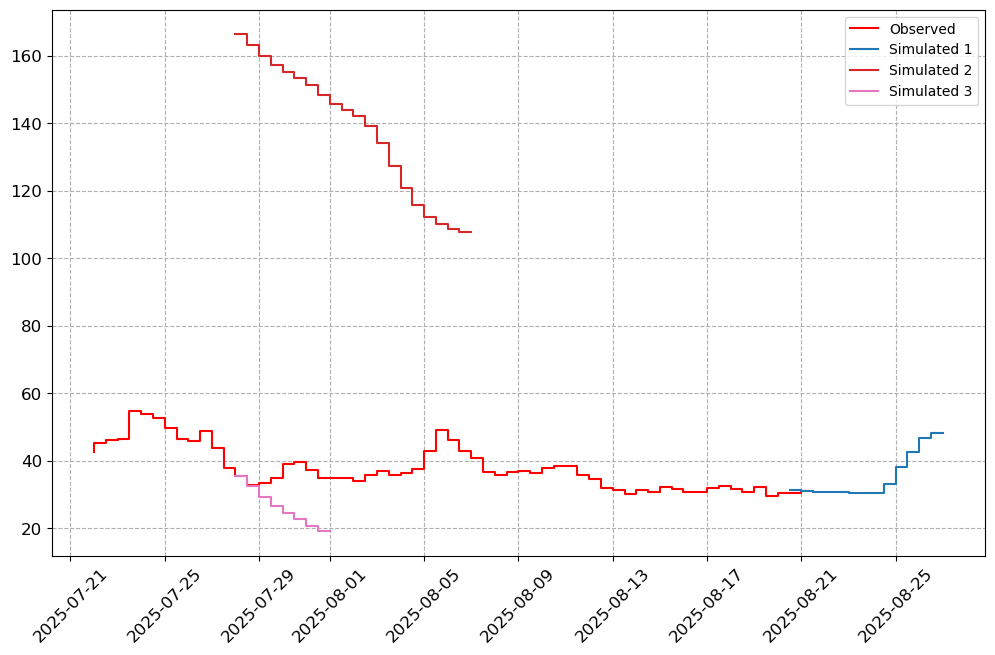

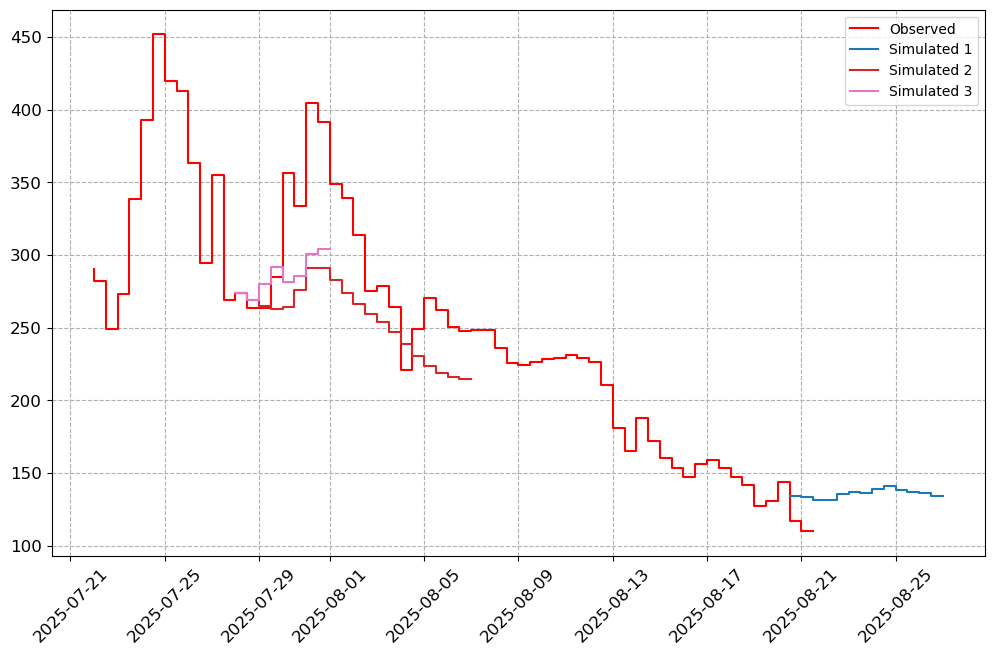

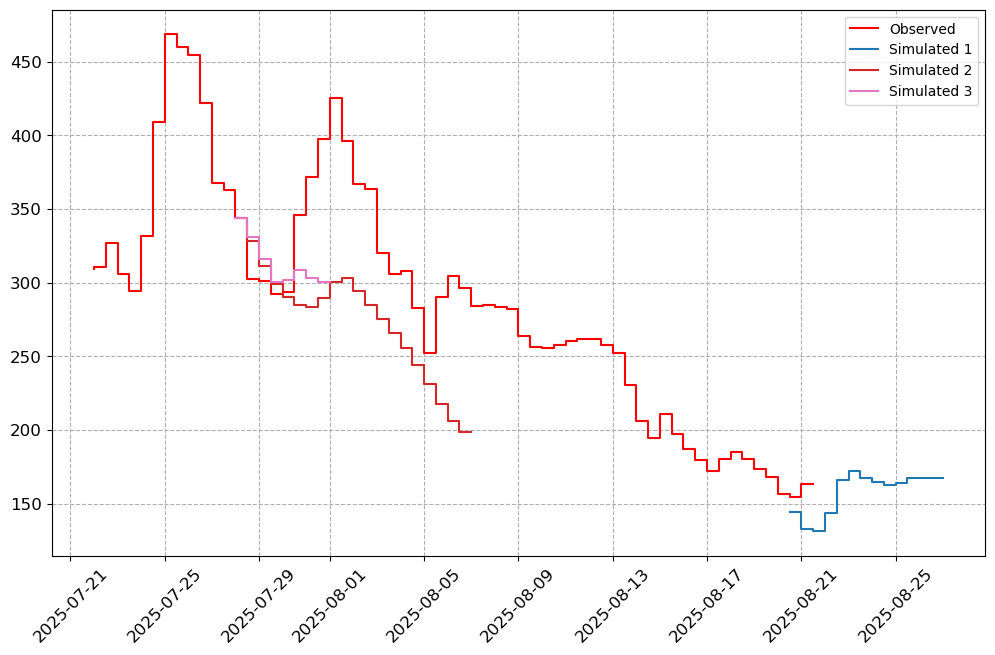

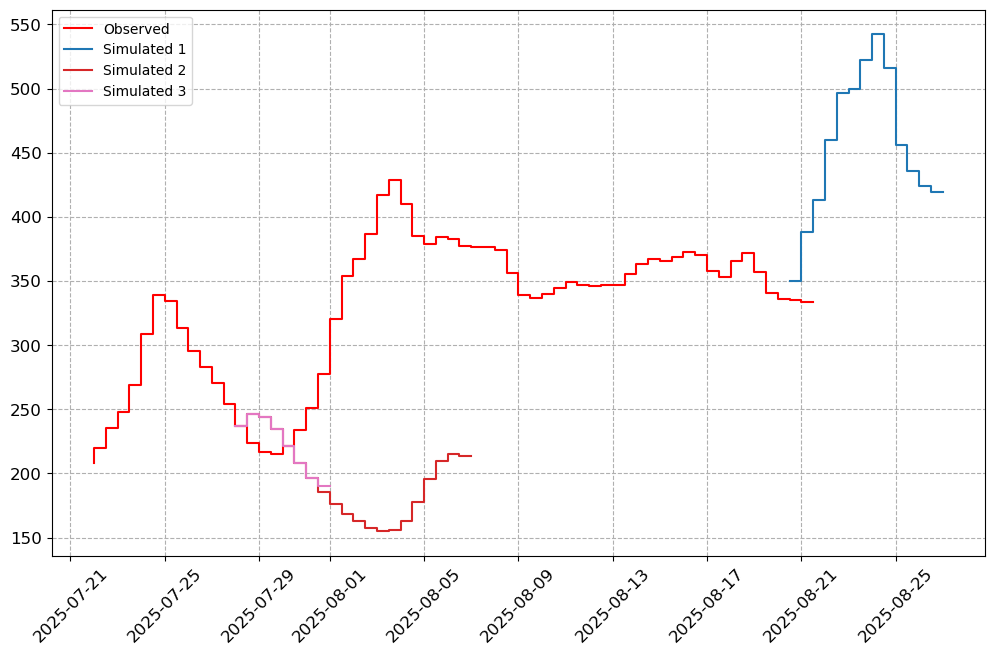

In [6]:
# Now we plot.

# Specify the Stations of importance.
stations_a = ["05AG006", "05BN012", "05AJ001", "05GG001"]
stations_b = ["05CK004", "05DF001", '05HG001', '05KD003']

visuals.plot(merged_df = merged.loc[:, [col for col in stations_a if col in merged.columns]],
             step = True, grid = True)

Number of simulated data columns: 3
Number of linewidths provided is less than the number of columns. Number of columns : 4. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 4. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 4. Number of legends provided is:  1. Applying Default legend names


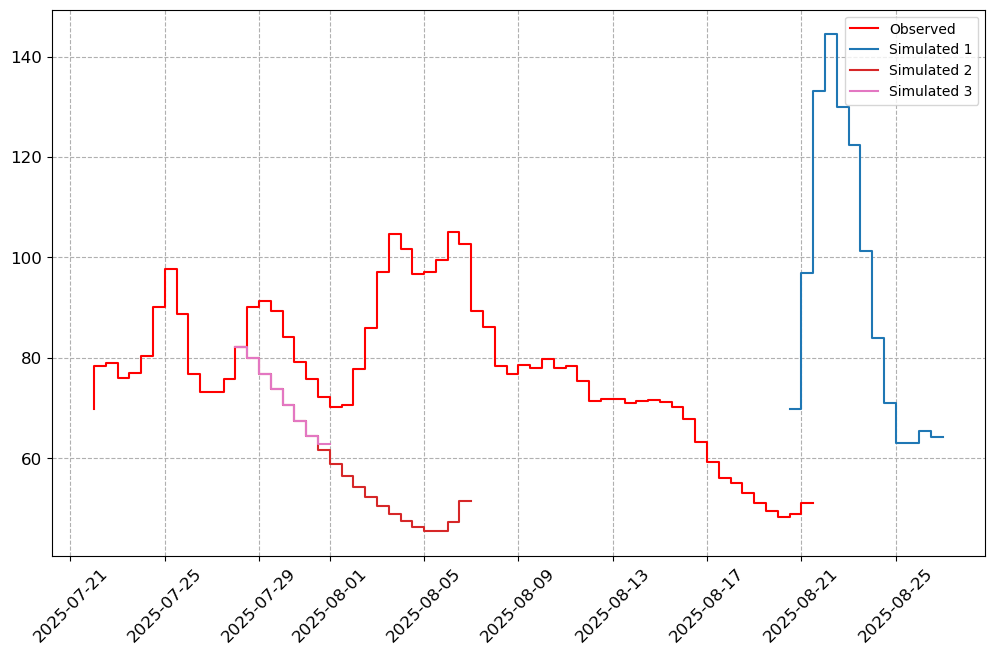

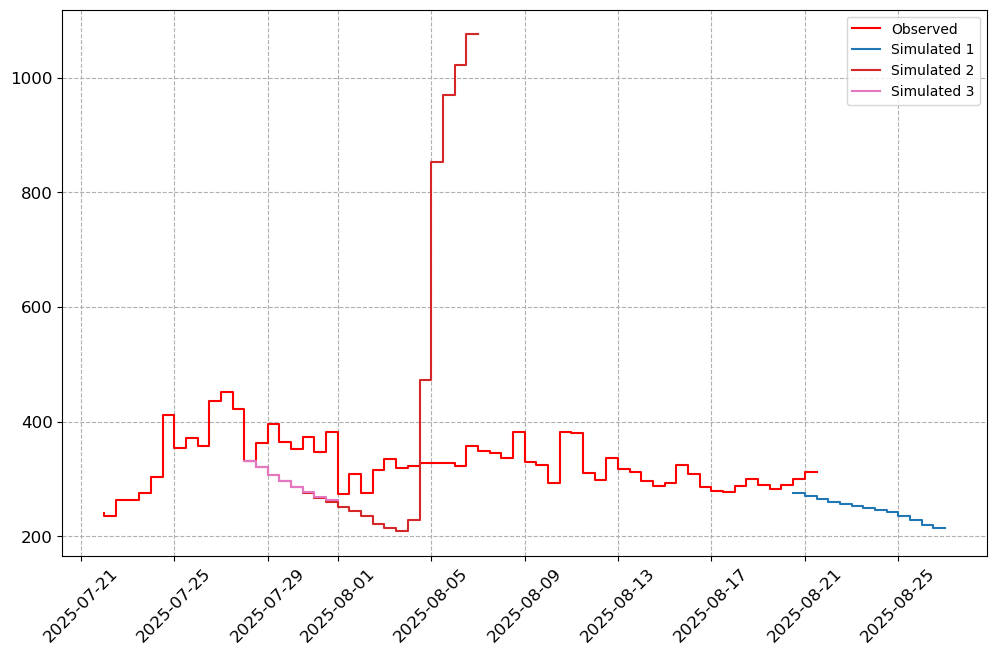

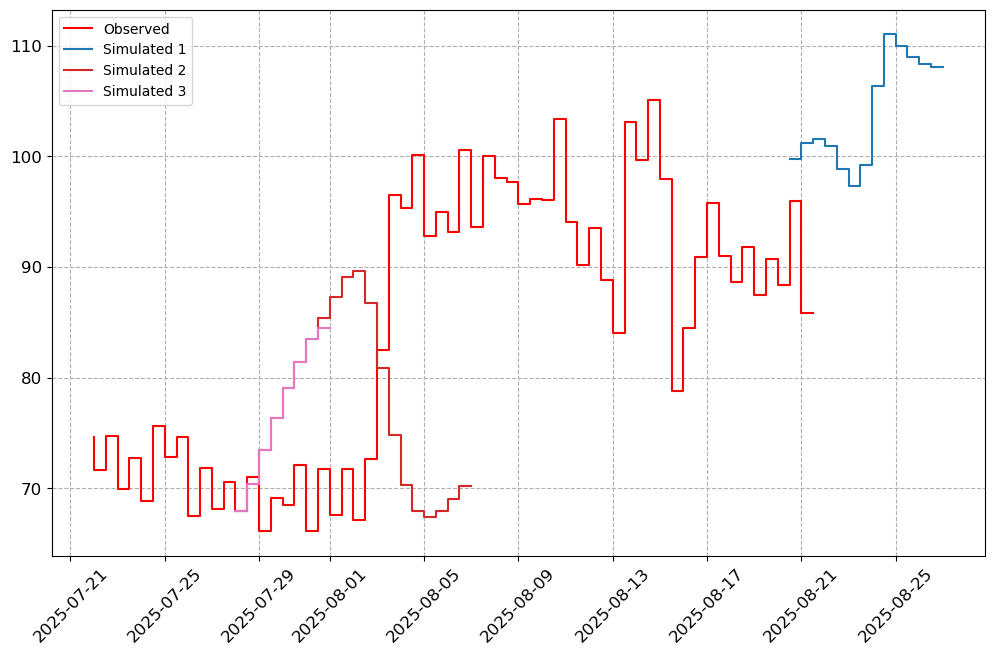

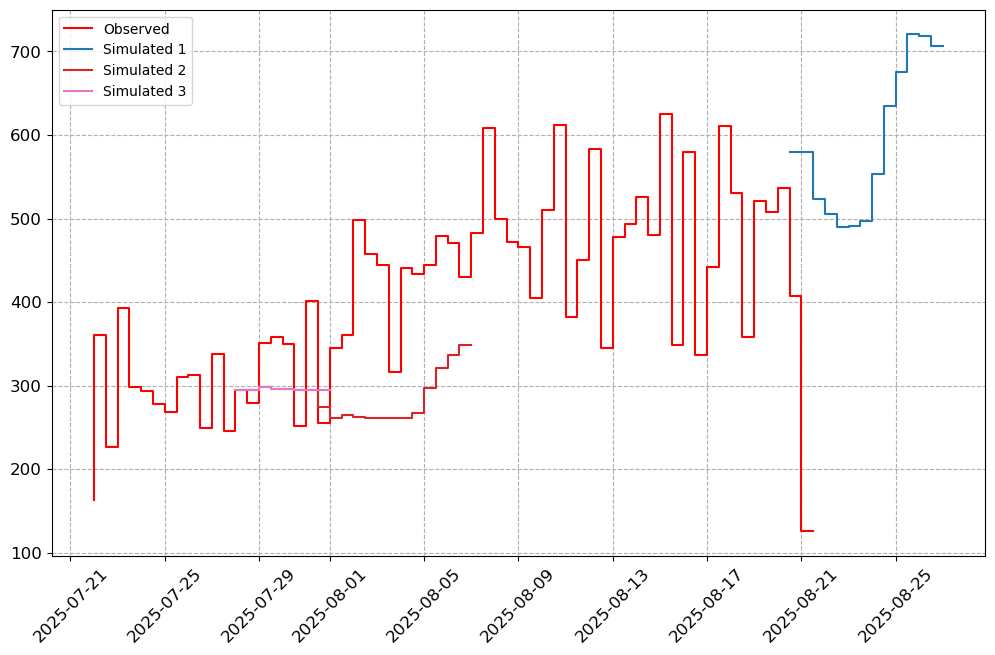

In [7]:
visuals.plot(merged_df = merged.loc[:, [col for col in stations_b if col in merged.columns]],
             step = True, grid = True)

Number of simulated data columns: 3
Number of linewidths provided is less than the number of columns. Number of columns : 4. Number of linewidths provided is:  1. Defaulting to 1.5


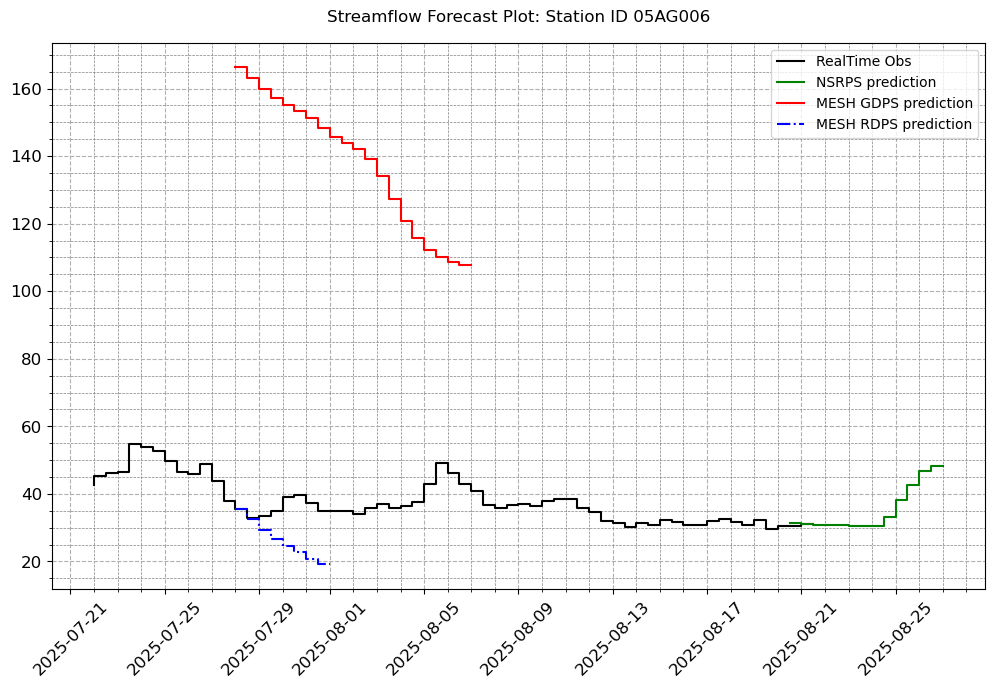

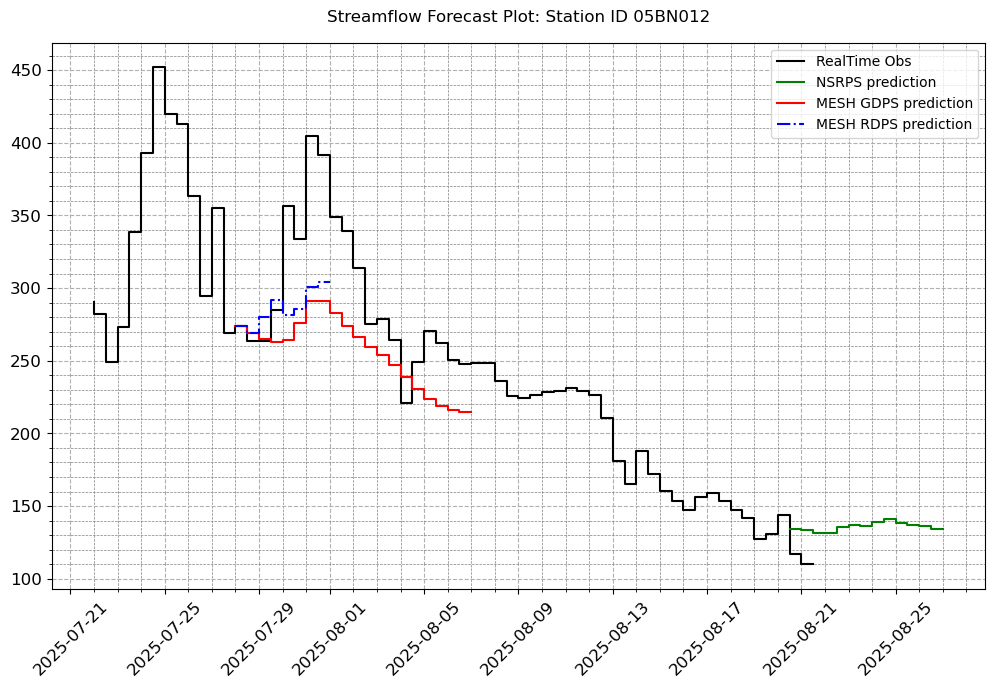

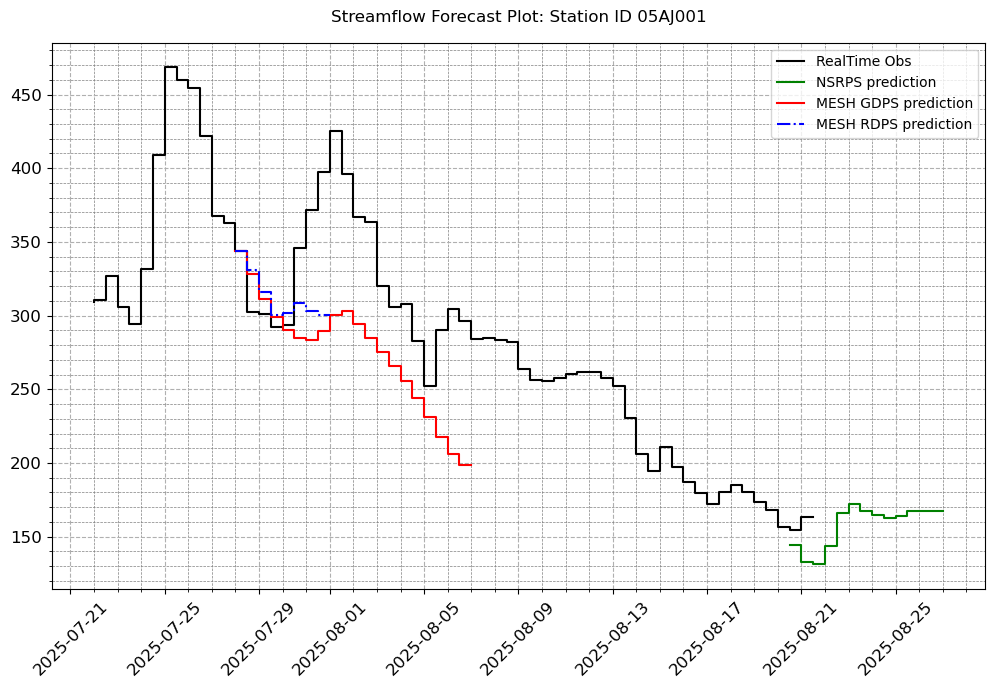

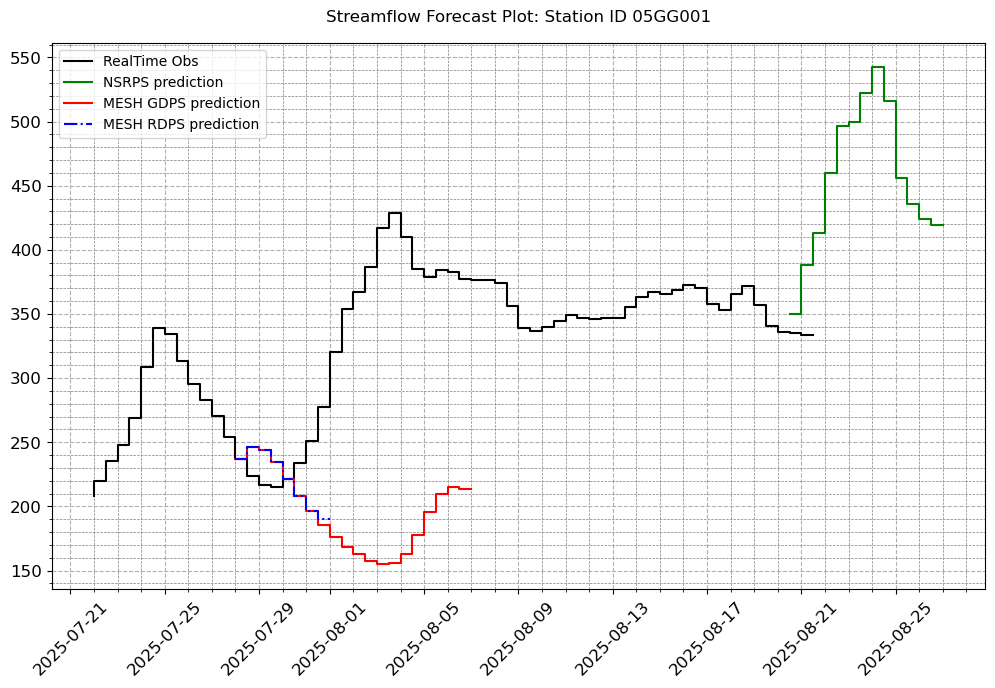

In [8]:
# Let us fill in the other plot features so that it looks exactly like we want.
visuals.plot(merged_df = merged.loc[:, [col for col in stations_a if col in merged.columns]], 
             step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction", "MESH GDPS prediction","MESH RDPS prediction"],
             linestyles=('k-', 'g-','r-', 'b-.'), minor_grid=True,
             title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_a],
             
            )

Number of simulated data columns: 3
Number of linewidths provided is less than the number of columns. Number of columns : 4. Number of linewidths provided is:  1. Defaulting to 1.5


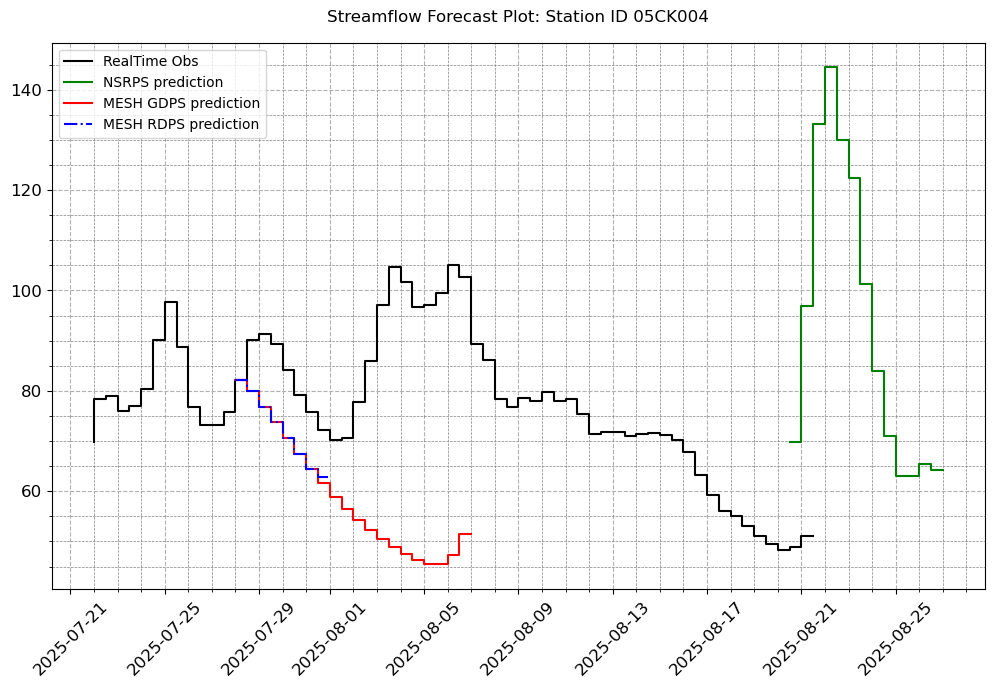

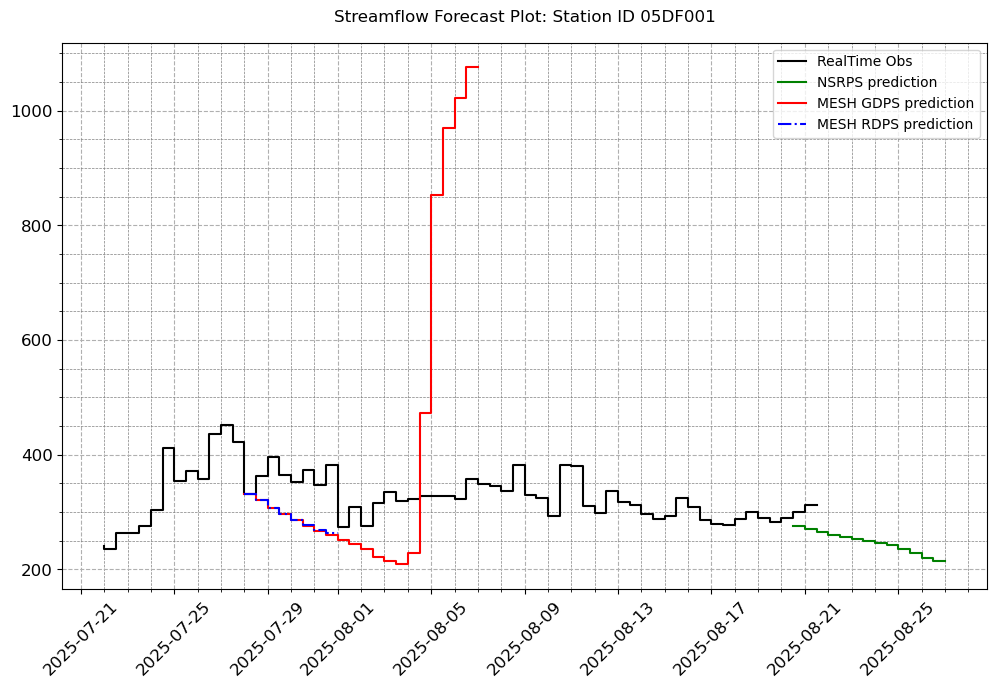

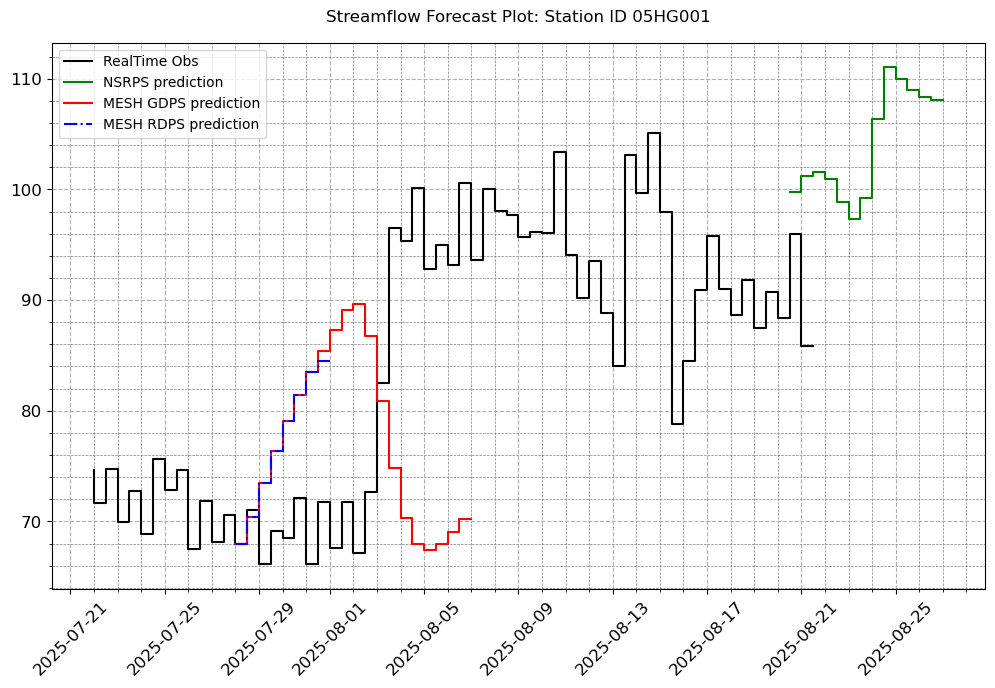

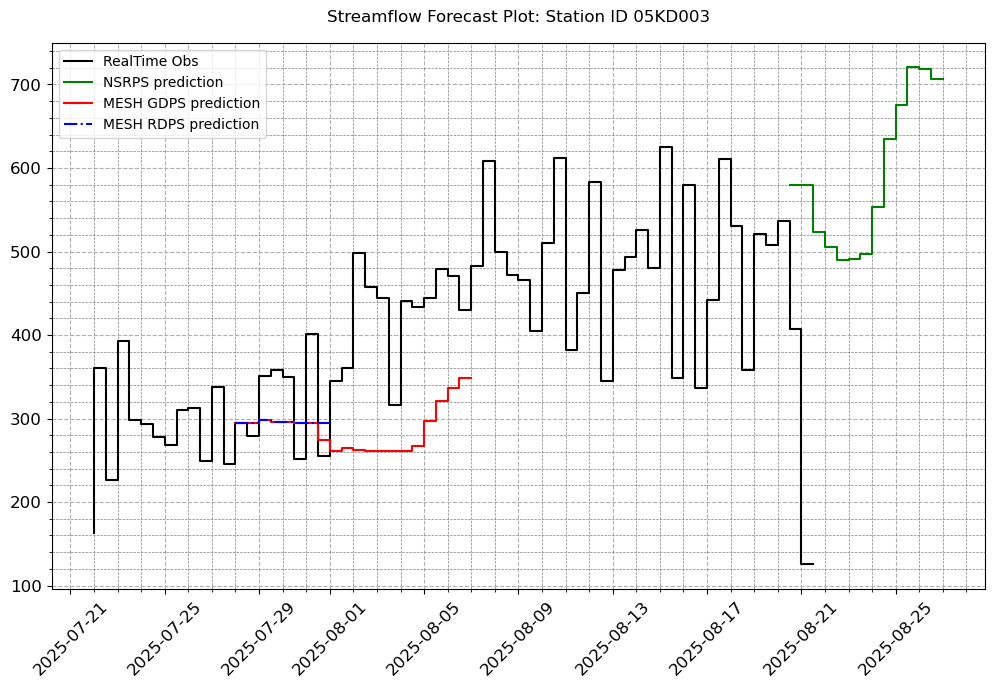

In [9]:
# Let us fill in the other plot features so that it looks exactly like we want.
visuals.plot(merged_df = merged.loc[:, [col for col in stations_b if col in merged.columns]], 
             step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction", "MESH GDPS prediction","MESH RDPS prediction"],
             linestyles=('k-', 'g-','r-', 'b-.'), minor_grid=True,
             title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_b]
            )

In [10]:
print("lt_median:\n",lt["lt_median"])
print("lt_Q75:\n",lt["lt_q75"])
print("lt_Q5:\n",lt["lt_q25"])

lt_median:
       05AA024  05AC003    05AD007    05AG006    05AJ001  05BB001  05BG010  \
jday                                                                        
1        8.33   0.6260  17.500000  20.000000  75.500000    9.520    2.580   
2        8.35   0.7600  18.000000  20.000000  75.099998    9.570    2.535   
3        8.45   0.7800  17.299999  19.600000  73.699997    9.680    2.540   
4        8.31   0.8000  18.500000  20.600000  67.300003    9.660    2.540   
5        8.62   0.6360  18.900000  20.299999  67.000000    9.660    2.505   
...       ...      ...        ...        ...        ...      ...      ...   
362      8.25   0.7000  18.450000  18.750000  72.250000    9.870    2.640   
363      8.25   0.6900  17.500000  19.250000  72.900002    9.640    2.630   
364      8.27   0.6700  17.750000  19.549999  75.700001    9.390    2.610   
365      8.25   0.6500  17.900001  19.250000  76.599998    9.615    2.610   
366      8.10   0.6595  17.500000  17.500000  68.300003   10.100

Observe that the indexes of the aggregations are integers from 1-366 and the Real-Time and NSRPS have datetime index. We have to convert the jday indexes to UTC datetime and then extract that 37 day time frame before we can plot the data.
To do that, we use the `prepare_historical_dataframes()` functions

In [11]:
median, upper, lower = forecast.prepare_historical_dataframes(merged, lt["lt_median"],[lt["lt_q95"],lt["lt_q75"]], [lt["lt_q5"],lt["lt_q25"]])
# Recall - merged is the 37 day data that we are trying to compare to
# this should extract the corresponding 37 days with UTC datetime index.

In [12]:
print("median:\n",lt["lt_median"])

median:
       05AA024  05AC003    05AD007    05AG006    05AJ001  05BB001  05BG010  \
jday                                                                        
1        8.33   0.6260  17.500000  20.000000  75.500000    9.520    2.580   
2        8.35   0.7600  18.000000  20.000000  75.099998    9.570    2.535   
3        8.45   0.7800  17.299999  19.600000  73.699997    9.680    2.540   
4        8.31   0.8000  18.500000  20.600000  67.300003    9.660    2.540   
5        8.62   0.6360  18.900000  20.299999  67.000000    9.660    2.505   
...       ...      ...        ...        ...        ...      ...      ...   
362      8.25   0.7000  18.450000  18.750000  72.250000    9.870    2.640   
363      8.25   0.6900  17.500000  19.250000  72.900002    9.640    2.630   
364      8.27   0.6700  17.750000  19.549999  75.700001    9.390    2.610   
365      8.25   0.6500  17.900001  19.250000  76.599998    9.615    2.610   
366      8.10   0.6595  17.500000  17.500000  68.300003   10.100   

Number of linewidths provided is less than the number of lines to plot. Number of lines : 5. Number of linewidths provided is:  1. Defaulting to 1.5


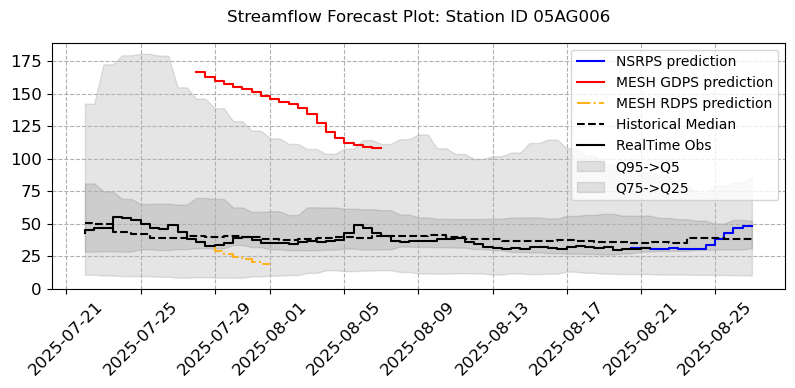

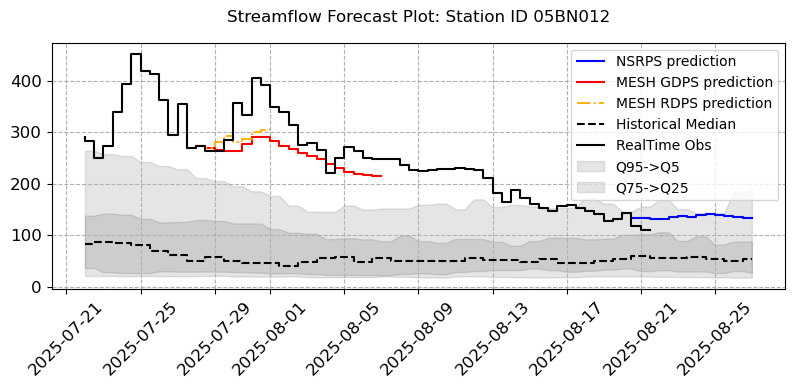

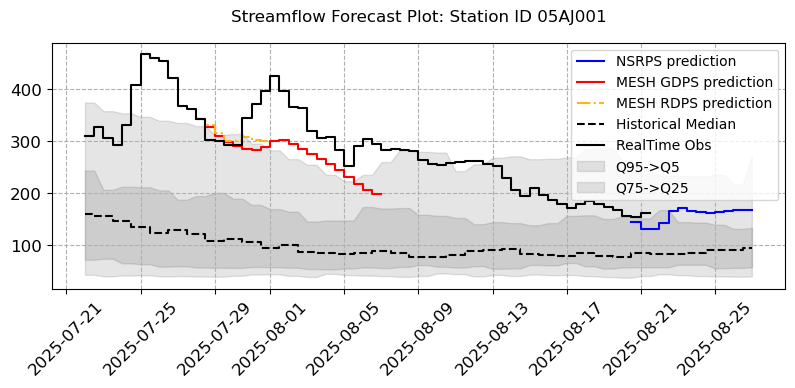

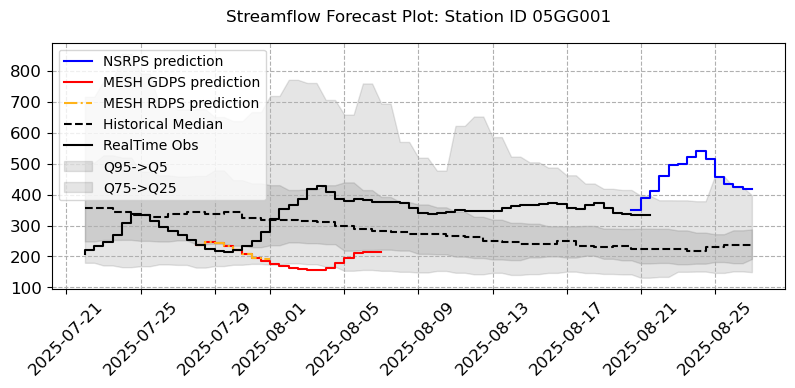

In [13]:
# Now we plot
visuals.bounded_plot(lines=merged.loc[:, [(s, "QOMEAS") for s in stations_a if (s, "QOMEAS") in merged.columns]], 
                     upper_bounds=[df.loc[:, [col for col in stations_a if col in df.columns]] for df in upper], 
                     lower_bounds=[df.loc[:, [col for col in stations_a if col in df.columns]] for df in lower], 
                     extra_lines=[merged.loc[:, [(s, "QOSIM1") for s in stations_a if (s, "QOSIM1") in merged.columns]],
                                  merged.loc[:, [(s, "QOSIM2") for s in stations_a if (s, "QOSIM2") in merged.columns]],
                                  merged.loc[:, [(s, "QOSIM3") for s in stations_a if (s, "QOSIM3") in merged.columns]],
                                  median.loc[:, [col for col in stations_a if col in median.columns]]
                                 ],
                     grid = True, step = True, legend = ["NSRPS prediction","MESH GDPS prediction","MESH RDPS prediction", "Historical Median", "RealTime Obs"], bound_legend= ["Q95->Q5","Q75->Q25"],
                     linestyles=("b-", "r-", "(1.00, 0.70, 0.10)-.", "k--", "(0.00, 0.00, 0.00)solid"), transparency = [0.1], title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_a],
                     fig_size = (8, 3)                    
                    )

Number of linewidths provided is less than the number of lines to plot. Number of lines : 5. Number of linewidths provided is:  1. Defaulting to 1.5


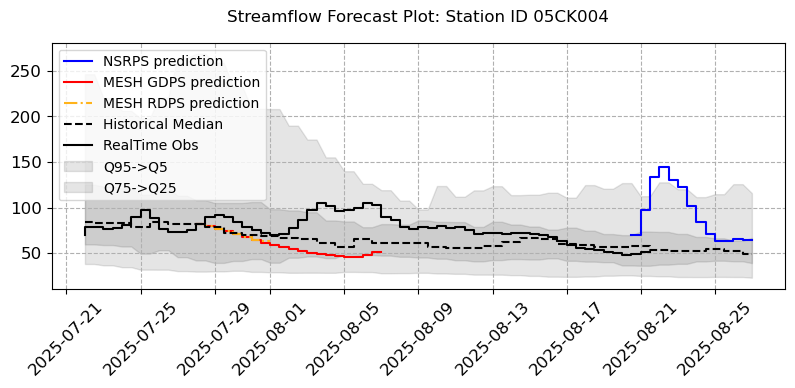

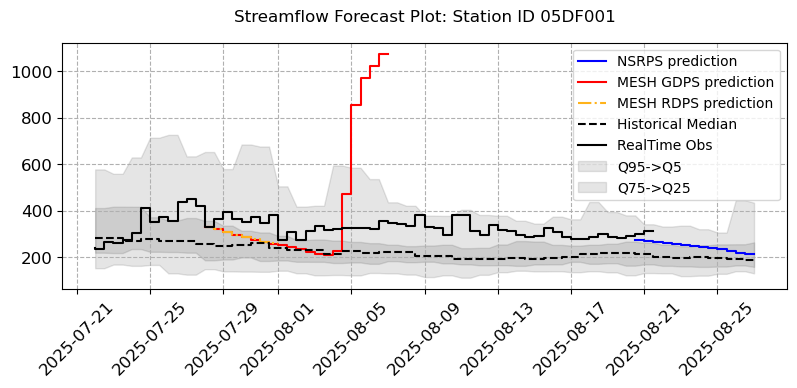

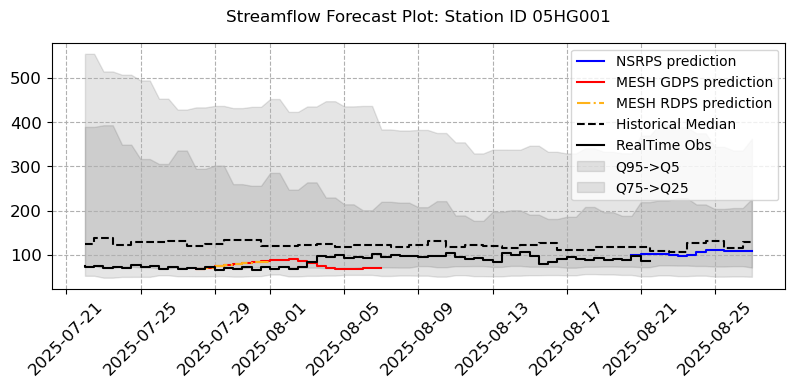

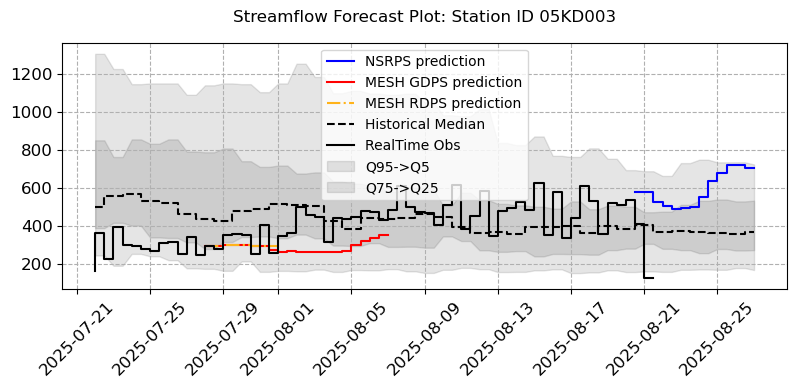

In [14]:
# Now we plot
# Now we plot
visuals.bounded_plot(lines=merged.loc[:, [(s, "QOMEAS") for s in stations_b if (s, "QOMEAS") in merged.columns]], 
                     upper_bounds=[df.loc[:, [col for col in stations_b if col in df.columns]] for df in upper], 
                     lower_bounds=[df.loc[:, [col for col in stations_b if col in df.columns]] for df in lower], 
                     extra_lines=[merged.loc[:, [(s, "QOSIM1") for s in stations_b if (s, "QOSIM1") in merged.columns]],
                                  merged.loc[:, [(s, "QOSIM2") for s in stations_b if (s, "QOSIM2") in merged.columns]],
                                  merged.loc[:, [(s, "QOSIM3") for s in stations_b if (s, "QOSIM3") in merged.columns]],
                                  median.loc[:, [col for col in stations_b if col in median.columns]]
                                 ],
                     grid = True, step = True, legend = ["NSRPS prediction","MESH GDPS prediction","MESH RDPS prediction", "Historical Median", "RealTime Obs"], bound_legend= ["Q95->Q5","Q75->Q25"],
                     linestyles=("b-", "r-", "(1.00, 0.70, 0.10)-.", "k--", "(0.00, 0.00, 0.00)solid"), transparency = [0.1], title = [f"Streamflow Forecast Plot: Station ID {i}" for i in stations_b],
#                      linewidth =(1.5,2, 1.5, 1.5, 1.5),
                     fig_size = (8, 3)                    
                    )

## Forecast Error

Using multiple days of saved observed and forecasted streamflow data we want to generate the rate of forecast error. That is we want to determine how accurate the forecast is when compared to the actual predicted value for that day. 

Lets calculate the error from the NSRPS predictions

### NSRPS Forecast Error Calculations

In [15]:
from pathlib import Path

# Directory containing the CSV files
dir_path = Path("../../../postprocessinglib/forecast/NSRPS_PRED")

# Find and sort all files starting with "merged" and ending with ".csv"
merged_files = sorted(dir_path.glob("merged*.csv"))

# Create a dictionary with keys as csv_1, csv_2, ...
DATA = {}
for i, file in enumerate(merged_files, start=1):
    df = pd.read_csv(file, header=[0, 1], index_col=0, parse_dates=True)
    df.columns = [f"{label}_{station}" for station, label in df.columns]
    df = df.drop(columns=[col for col in df.columns if col.startswith('QOMEAS_')])
    DATA[f"csv_{i}"] = df
    
DATA.keys()

dict_keys(['csv_1', 'csv_2', 'csv_3', 'csv_4', 'csv_5', 'csv_6', 'csv_7', 'csv_8', 'csv_9', 'csv_10', 'csv_11', 'csv_12', 'csv_13', 'csv_14', 'csv_15', 'csv_16', 'csv_17', 'csv_18', 'csv_19', 'csv_20', 'csv_21', 'csv_22', 'csv_23', 'csv_24', 'csv_25', 'csv_26', 'csv_27', 'csv_28', 'csv_29', 'csv_30', 'csv_31', 'csv_32', 'csv_33', 'csv_34', 'csv_35', 'csv_36', 'csv_37', 'csv_38', 'csv_39', 'csv_40', 'csv_41', 'csv_42', 'csv_43', 'csv_44', 'csv_45'])

In [16]:
df_stats = forecast.forecast_error_calculation(
    files=list(DATA.values()),
    stats= ['q10', 'q25', 'q50', 'q75', 'q90' ]
)

Window 2025-07-21–2025-07-22 in 4.3s
Window 2025-07-22–2025-07-23 in 4.6s
Window 2025-07-23–2025-07-24 in 4.8s
Window 2025-07-24–2025-07-25 in 4.6s
Window 2025-07-25–2025-07-26 in 4.6s
Window 2025-07-26–2025-07-27 in 4.5s
Window 2025-07-27–2025-07-28 in 4.5s
Window 2025-07-28–2025-07-29 in 4.7s
Window 2025-07-29–2025-07-30 in 4.7s
Window 2025-07-30–2025-07-31 in 4.7s
Window 2025-07-31–2025-08-01 in 4.5s
Window 2025-08-01–2025-08-02 in 4.5s
Window 2025-08-02–2025-08-03 in 4.5s
Window 2025-08-03–2025-08-04 in 4.7s
Window 2025-08-04–2025-08-05 in 4.7s
Window 2025-08-05–2025-08-06 in 4.6s
Window 2025-08-06–2025-08-07 in 4.8s
Window 2025-08-07–2025-08-08 in 4.6s
Window 2025-08-08–2025-08-09 in 4.8s
Window 2025-08-09–2025-08-10 in 4.5s
Window 2025-08-10–2025-08-11 in 4.7s
Window 2025-08-11–2025-08-12 in 4.6s
Window 2025-08-12–2025-08-13 in 4.7s
Window 2025-08-13–2025-08-14 in 4.5s
Window 2025-08-14–2025-08-15 in 4.8s
Window 2025-08-15–2025-08-16 in 4.5s
Window 2025-08-16–2025-08-17 in 5.4s
W

C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{fre

⚠️ Skipping file/index 44 — no QOSIM columns.
⚠️ Skipping file/index 45 — no QOSIM columns.


Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of linewidths provided is less than the number of lines to plot. Number of lines : 3. Number of linewidths provided is:  1. Defaulting to 1.5


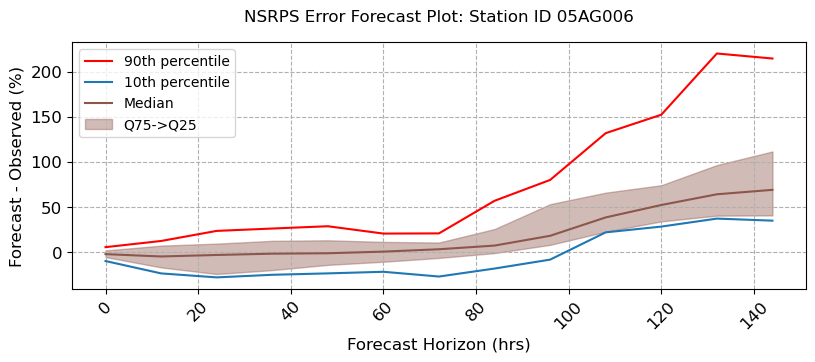

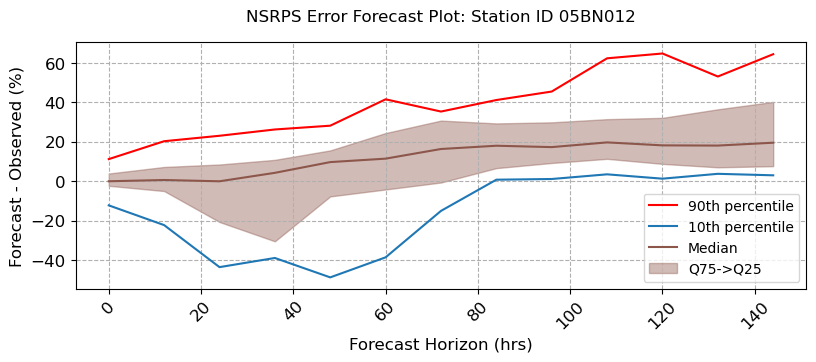

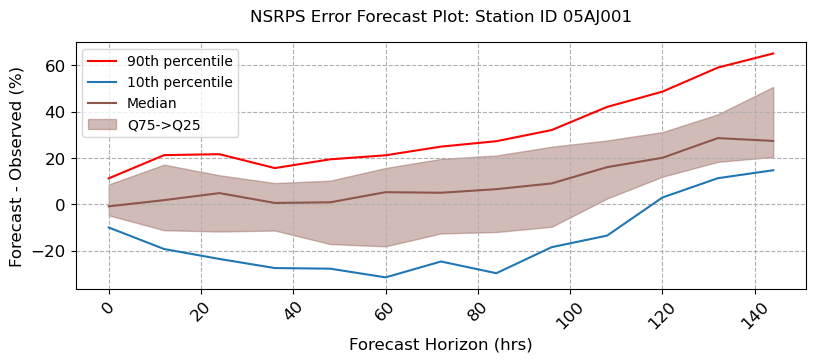

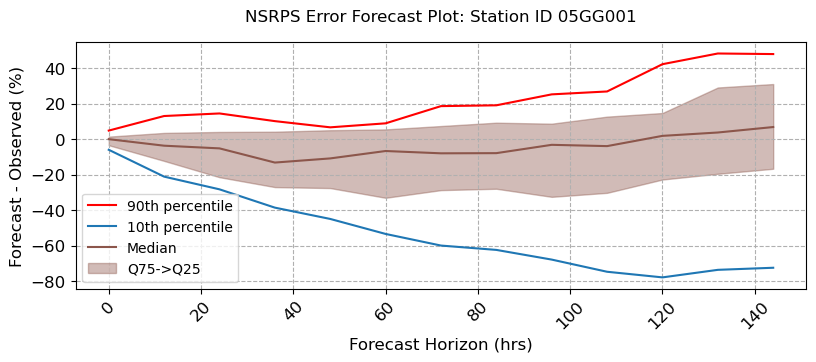

In [17]:
visuals.bounded_plot(
    lines = df_stats.loc[:, [(s, "Q50") for s in stations_a if (s, "Q50") in df_stats.columns]],
    upper_bounds = df_stats.loc[:, [(s, "Q75") for s in stations_a if (s, "Q75") in df_stats.columns]],
    lower_bounds = df_stats.loc[:, [(s, "Q25") for s in stations_a if (s, "Q25") in df_stats.columns]],
    extra_lines = [
        df_stats.loc[:, [(s, "Q90") for s in stations_a if (s, "Q90") in df_stats.columns]],
        df_stats.loc[:, [(s, "Q10") for s in stations_a if (s, "Q10") in df_stats.columns]]
    ],
    grid = True, legend = ["90th percentile", "10th percentile", "Median"],
    bound_legend= ["Q75->Q25"],
    labels = [ "Forecast Horizon (hrs)", "Forecast - Observed (%)",],
    title = [f"NSRPS Error Forecast Plot: Station ID {i}" for i in stations_a ],
    fig_size = (8, 3)
)

Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of linewidths provided is less than the number of lines to plot. Number of lines : 3. Number of linewidths provided is:  1. Defaulting to 1.5


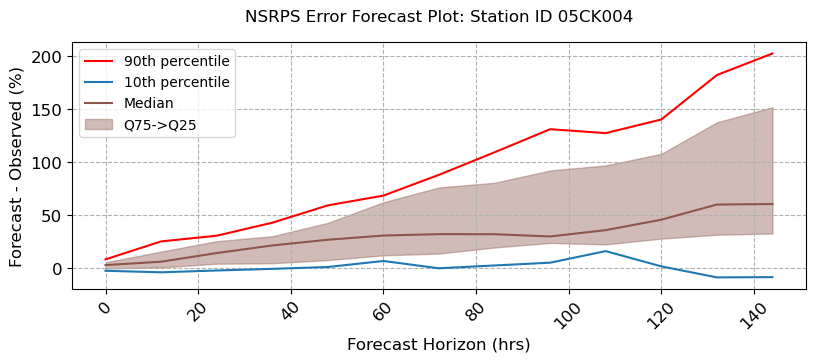

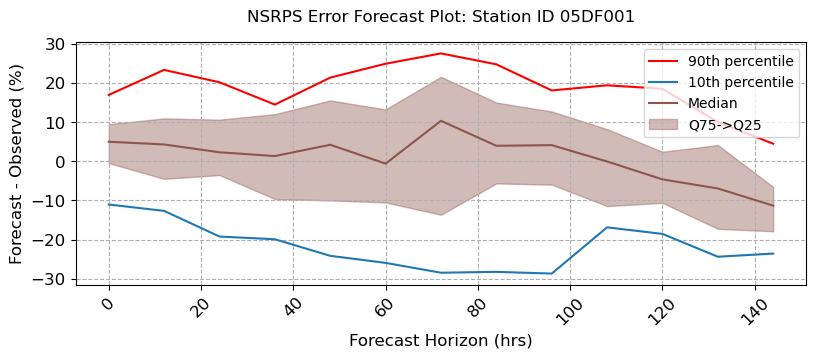

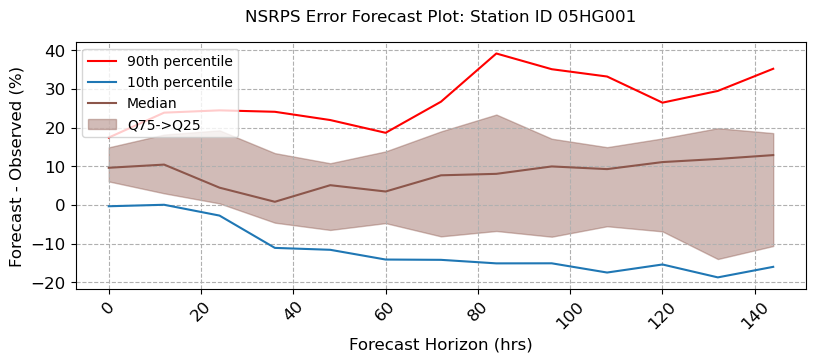

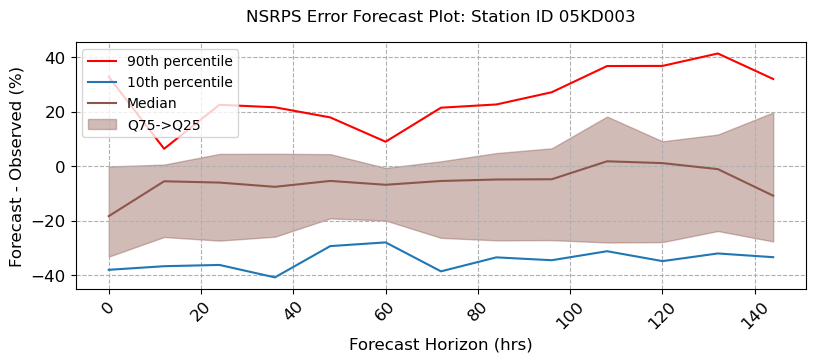

In [18]:
visuals.bounded_plot(
    lines = df_stats.loc[:, [(s, "Q50") for s in stations_b if (s, "Q50") in df_stats.columns]],
    upper_bounds = df_stats.loc[:, [(s, "Q75") for s in stations_b if (s, "Q75") in df_stats.columns]],
    lower_bounds = df_stats.loc[:, [(s, "Q25") for s in stations_b if (s, "Q25") in df_stats.columns]],
    extra_lines = [
        df_stats.loc[:, [(s, "Q90") for s in stations_b if (s, "Q90") in df_stats.columns]],
        df_stats.loc[:, [(s, "Q10") for s in stations_b if (s, "Q10") in df_stats.columns]]
    ],
    grid = True, legend = ["90th percentile", "10th percentile", "Median"],
    bound_legend= ["Q75->Q25"],
    labels = [ "Forecast Horizon (hrs)", "Forecast - Observed (%)",],
    title = [f"NSRPS Error Forecast Plot: Station ID {i}" for i in stations_b ],
    fig_size = (8, 3)
)

### MESH Forecast Error Calculations

In [19]:
from pathlib import Path

base_path = Path(
    "C:/Users/udenzeU/OneDrive - EC-EC/Fuad_Mesh_Dataset/"
    "srb_prediction_system_multi_run/gem_forecasts/05KJ001"
)

dates = [f"202507{day:02d}18" for day in range(20, 30)]

merged_files = []

for date in dates:
    gdps_path = base_path / date / "GDPS"
    # Use glob to match RESULTS1 to RESULTS10 folders inside GDPS
    for result_folder in gdps_path.glob("RESULTS*"):
        file_path = result_folder / "MESH_output_streamflow_ts.csv"
        if file_path.exists():
            merged_files.append(file_path)


In [ ]:
df_stats = forecast.forecast_error_calculation(
    files=merged_files,
    stats= ['q10', 'q25', 'q50', 'q75', 'q90' ]
)

Window 2025-07-21–2025-07-22 in 6.5s
Window 2025-07-22–2025-07-23 in 6.6s
Window 2025-07-23–2025-07-24 in 7.2s
Window 2025-07-24–2025-07-25 in 6.7s
Window 2025-07-25–2025-07-26 in 7.1s
Window 2025-07-26–2025-07-27 in 6.7s
Window 2025-07-27–2025-07-28 in 6.5s
Window 2025-07-28–2025-07-29 in 6.6s
Window 2025-07-29–2025-07-30 in 6.4s
Window 2025-07-30–2025-07-31 in 6.4s
Window 2025-07-31–2025-08-01 in 6.7s
Window 2025-08-01–2025-08-02 in 6.6s
Window 2025-08-02–2025-08-03 in 6.8s
Window 2025-08-03–2025-08-04 in 6.4s
Window 2025-08-04–2025-08-05 in 7.0s
Window 2025-08-05–2025-08-06 in 6.5s
Window 2025-08-06–2025-08-07 in 6.6s
Window 2025-08-07–2025-08-08 in 6.5s
Window 2025-08-08–2025-08-09 in 6.4s
Window 2025-08-09–2025-08-10 in 6.3s


In [ ]:
visuals.bounded_plot(
    lines = df_stats.loc[:, [(s, "Q50") for s in stations_a if (s, "Q50") in df_stats.columns]],
    upper_bounds = df_stats.loc[:, [(s, "Q75") for s in stations_a if (s, "Q75") in df_stats.columns]],
    lower_bounds = df_stats.loc[:, [(s, "Q25") for s in stations_a if (s, "Q25") in df_stats.columns]],
    extra_lines = [
        df_stats.loc[:, [(s, "Q90") for s in stations_a if (s, "Q90") in df_stats.columns]],
        df_stats.loc[:, [(s, "Q10") for s in stations_a if (s, "Q10") in df_stats.columns]]
    ],
    grid = True, legend = ["90th percentile", "10th percentile", "Median"],
    bound_legend= ["Q75->Q25"],
    labels = [ "Forecast Horizon (hrs)", "Forecast - Observed (%)",],
    title = [f"MESH Error Forecast Plot: Station ID {i}" for i in stations_a ],
    fig_size = (8, 3)
)

In [ ]:
visuals.bounded_plot(
    lines = df_stats.loc[:, [(s, "Q50") for s in stations_b if (s, "Q50") in df_stats.columns]],
    upper_bounds = df_stats.loc[:, [(s, "Q75") for s in stations_b if (s, "Q75") in df_stats.columns]],
    lower_bounds = df_stats.loc[:, [(s, "Q25") for s in stations_b if (s, "Q25") in df_stats.columns]],
    extra_lines = [
        df_stats.loc[:, [(s, "Q90") for s in stations_b if (s, "Q90") in df_stats.columns]],
        df_stats.loc[:, [(s, "Q10") for s in stations_b if (s, "Q10") in df_stats.columns]]
    ],
    grid = True, legend = ["90th percentile", "10th percentile", "Median"],
    bound_legend= ["Q75->Q25"],
    labels = [ "Forecast Horizon (hrs)", "Forecast - Observed (%)",],
    title = [f"MESH Error Forecast Plot: Station ID {i}" for i in stations_b ],
    fig_size = (8, 3)
)